In [1]:
# Initialize and Import Required Modules

In [2]:
# General Libraries
import torch
import argparse
import numpy as np
import random
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:


# Test cifar 122



In [4]:
# Import the MNIST Autoencoder file
import CIFAR10_122  

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define arguments
args = argparse.Namespace(
    data_path="../data",
    batch_size=128,
    latent_dim=128,
    device=device
)

In [5]:
#Load the Dataset and Check It

Files already downloaded and verified


Files already downloaded and verified


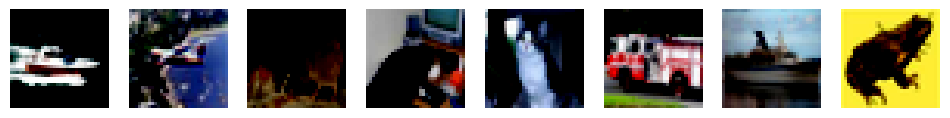

In [6]:
# Load dataset
train_loader, val_loader, test_loader = CIFAR10_122.load_data(args)

# Retrieve a batch of images
images_0_1, _ = next(iter(train_loader))

# Convert images to range [0,255] for proper display
images_0_255 = images_0_1 * 255  # Scale if needed

# Visualize some images
fig, axes = plt.subplots(1, 8, figsize=(12, 4))
for i in range(8):
    img = images_0_255[i].permute(1, 2, 0).numpy()  # Convert (C, H, W) → (H, W, C)
    img = np.clip(img, 0, 255).astype("uint8")  # Ensure valid pixel values
    axes[i].imshow(img)
    axes[i].axis("off")

plt.show()


In [7]:
#Verify the Autoencoder Model Architecture

In [8]:
# Initialize model
encoder_model = CIFAR10_122.Encoder(args.latent_dim).to(args.device)

# Print model summary
print(encoder_model)

Encoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(128, 128, kernel_size=(8, 8), stride=(1, 1))
  )
)


In [9]:
# Initialize model
classifier_model = CIFAR10_122.Classifier(args.latent_dim).to(args.device)

# Print model summary
print(classifier_model)

Classifier(
  (fc): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [10]:
#Train the model

In [11]:
CIFAR10_122.train_encoder_classifier(encoder_model, classifier_model, train_loader, val_loader, args, epochs=15)

Epoch [1/15], Train Loss: 1.5290, Train Acc: 44.83%, Val Loss: 1.2480, Val Acc: 55.48%


Epoch [2/15], Train Loss: 1.1499, Train Acc: 59.19%, Val Loss: 1.0467, Val Acc: 62.73%


Epoch [3/15], Train Loss: 0.9795, Train Acc: 65.47%, Val Loss: 1.0061, Val Acc: 64.78%


Epoch [4/15], Train Loss: 0.8465, Train Acc: 70.19%, Val Loss: 0.9786, Val Acc: 65.33%


Epoch [5/15], Train Loss: 0.7378, Train Acc: 74.08%, Val Loss: 0.9321, Val Acc: 67.62%


Epoch [6/15], Train Loss: 0.6264, Train Acc: 77.78%, Val Loss: 0.9480, Val Acc: 67.92%


Epoch [7/15], Train Loss: 0.5345, Train Acc: 80.98%, Val Loss: 1.0306, Val Acc: 67.55%


Epoch [8/15], Train Loss: 0.4538, Train Acc: 83.86%, Val Loss: 1.0819, Val Acc: 67.84%


Epoch [9/15], Train Loss: 0.3859, Train Acc: 86.16%, Val Loss: 1.1438, Val Acc: 67.50%


Epoch [10/15], Train Loss: 0.3216, Train Acc: 88.35%, Val Loss: 1.2397, Val Acc: 67.66%


Epoch [11/15], Train Loss: 0.2750, Train Acc: 89.91%, Val Loss: 1.3795, Val Acc: 67.30%


Epoch [12/15], Train Loss: 0.2413, Train Acc: 91.33%, Val Loss: 1.4356, Val Acc: 66.49%


Epoch [13/15], Train Loss: 0.2057, Train Acc: 92.63%, Val Loss: 1.5378, Val Acc: 65.70%


Epoch [14/15], Train Loss: 0.1870, Train Acc: 93.21%, Val Loss: 1.6208, Val Acc: 66.68%


Epoch [15/15], Train Loss: 0.1657, Train Acc: 94.08%, Val Loss: 1.7580, Val Acc: 66.19%
